### **Part - I**

In [0]:
# Initial Setup

import os
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline
from random import seed
from random import randint
os.chdir("/content/drive/My Drive/Colab Notebooks/Datasets/hh/t1")

In [0]:
# Function to crop images --->

def crop_tuple_of_images(input_tuple, random_seed):
  seed(random_seed)
  image_number = randint(0, 240)
  start_pixel_y = randint(0, 180)
  sum_up_y = randint(11, 31)
  end_pixel_y = start_pixel_y + sum_up_y
  start_pixel_x = randint(0, 240)
  sum_up_x = randint(11, 31)
  end_pixel_x = start_pixel_x + sum_up_x

  image_count = 0
  processed_list = list()

  for image in input_tuple:
    processed_image = image[image_number, start_pixel_y:end_pixel_y, start_pixel_x:end_pixel_x]
    processed_list.append(processed_image) 
    image_count = image_count + 1

  pixel_specs = [image_number, start_pixel_y, end_pixel_y, sum_up_y, start_pixel_x, end_pixel_x, sum_up_x]
  output_tuple = tuple(processed_list)

  message_string = "Processed -> " + str(image_count) + " images...."
  print(message_string)

  return (output_tuple, pixel_specs)

In [0]:
os.chdir("/content/drive/My Drive/Colab Notebooks/Datasets/hh/t1")
images_set_1 = nib.load("IXI012-HH-1211-T1_fcm.nii.gz")
images_set_1 = images_set_1.get_fdata()
os.chdir("/content/drive/My Drive/Colab Notebooks/Datasets/hh/t2")
images_set_2 = nib.load("IXI012-HH-1211-T2_reg_fcm.nii.gz")
images_set_2 = images_set_2.get_fdata()

input_tuple = (images_set_1, images_set_2)

In [5]:
returned_tuple, random_numbers = crop_tuple_of_images(input_tuple, random_seed = 11)

Processed -> 2 images....


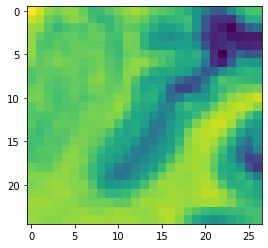

In [6]:
plt.imshow(returned_tuple[0])

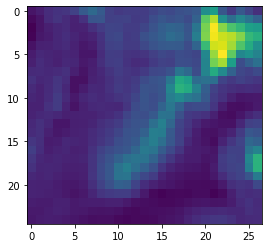

In [7]:
plt.imshow(returned_tuple[1])

In [8]:
random_numbers

[115, 143, 168, 25, 115, 142, 27]

### **Part - II**

In [0]:
# Class for dataset --->

class scan_dataset:
  def __init__(self, data_path, image_set, image_number, y_start, y_end, x_start, x_end, random_seed):
    os.chdir(data_path)
    image_set_raw = nib.load(image_set)
    self.image_set = image_set_raw.get_fdata()
    self.image_number = image_number
    self.y_start = y_start
    self.y_end = y_end
    self.x_start = x_start
    self.x_end = x_end
    self.random_seed = random_seed

  def __len__(self):
    return len(self.image_set)

  def __getitem__(self):
    return(self.image_set[self.image_number, self.y_start:self.y_end, self.x_start:self.x_end])

  def random_crop(self):
    seed(self.random_seed)
    start_pixel_y = randint(0, 180)
    sum_up_y = randint(11, 31)
    end_pixel_y = start_pixel_y + sum_up_y
    start_pixel_x = randint(0, 240)
    sum_up_x = randint(11, 31)
    end_pixel_x = start_pixel_x + sum_up_x
    cropped_image = self.image_set[self.image_number, start_pixel_y:end_pixel_y, start_pixel_x:end_pixel_x]
    pixel_specs = [self.image_number, start_pixel_y, end_pixel_y, sum_up_y, start_pixel_x, end_pixel_x, sum_up_x]
    return(cropped_image, pixel_specs)

In [0]:
data_path = "/content/drive/My Drive/Colab Notebooks/Datasets/hh/t1"
image_set = "IXI012-HH-1211-T1_fcm.nii.gz"
dataset_1 = scan_dataset(data_path= data_path, image_set = image_set, image_number = 7, y_start = 11, y_end = 41, x_start = 11, x_end = 51)

In [24]:
length_ds_1 = dataset_1.__len__()
print(length_ds_1)

240


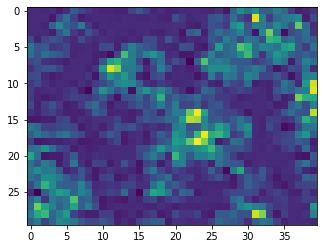

In [25]:
plt.imshow(dataset_1.__getitem__())

### **Bringing Part I and Part II together**

In [0]:
sample_list = list()
cropped_pics = list()

for i in range(1, 11):
  image_init = scan_dataset(data_path= data_path, image_set = image_set, image_number = i, y_start = 0, y_end = 240, x_start = 0, x_end = 180, random_seed = 1008)
  cropped_img, specs = image_init.random_crop()
  cropped_pics.append(cropped_img)

cropped_tuple = tuple(cropped_pics)

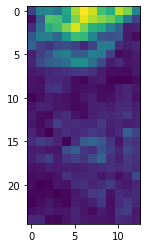

In [36]:
plt.imshow(cropped_tuple[7])

In [0]:
#End